In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.general.make_noise import beep_on_error, beep_repeat
beep_on_error()

In [3]:
import pandas as pd
import numpy as np
from src.data_tools.filename_skim_tools import regex_select, get_files, make_df
from src.data_tools.bff_meta import preselection, band_cut, isin, identity, all_reg, jet_variations
from src.data_tools.bff_cuts import *

from glob import glob
import re

/cvmfs/cms.cern.ch/slc7_amd64_gcc900/external/py3-scipy/1.7.1-c59502069094870046fda47cb5a5065e/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [4]:
def one_in(list_of_strings, test_string):
    for string_in in list_of_strings:
        if string_in in test_string: return True
    return False

In [5]:
from src.data_tools.get_file_list import get_file_df
from src.data_tools.get_data import get_data
from src.data_tools.apply_cuts_v2 import  process_sample

In [6]:
output_dir = 'assets_feb_23'

In [7]:
era = 2017
file_df = get_file_df(path = "{}/data".format(output_dir))
file_df = file_df[file_df.era==era]
file_df.reset_index(inplace=True)

In [8]:
##
## hist making
##

In [9]:
from src.plotting_tools.Bins import Bins, bins, binning_type
from src.plotting_tools.cms_format import cms_format_fig, cms_style
from src.plotting_tools.colors import color_fader
from src.assets.regions import nJets, regions, region_and_label
from src.assets.file_groups import bck_dict, bck_list, bck_colors
from src.plotting_tools.draw_stack_plot_hists import draw_bckground, draw_signals, draw_data, draw_stackplot
from src.plotting_tools.latexAssets import HTLT, RelMET
import matplotlib.pyplot as plt

from src.plotting_tools.SysHist import make_sys_hist, SysHist

from src.assets.lumi import lumi_dict
lumi = lumi_dict[str(era)]

In [10]:
hists = {
"DiLepMass": Bins(np.linspace(105, 900, (900-105)+1)), 
"HTLT": Bins(np.linspace(-800,800,100)), 
"RelMET": Bins(np.linspace(0, 2,100)), 
"minGoodJetElDR": Bins(np.linspace(0,5,100)), 
}

In [11]:
regions

['SR1', 'SR2', 'CR10', 'CR20', 'CR13', 'CR23', 'CR14', 'CR24']

In [12]:
draw_inline = True
if draw_inline:
    plt.ion()
else:
    plt.ioff()

In [13]:
def make_hist_dict(row, reg, feature):
    bins = hists[feature]
    isdata = row.type=='data'
    hist = make_sys_hist(df, feature, reg, bin_edges=bins.bin_edges,
                     ind_sys_hist=False, select_level=1, 
                         isdata=isdata)
    
    hist_dict = hist.to_dict()
    
    hist_dict['reg'] = reg
    hist_dict['feature'] = feature
    
    return {**row.to_dict(), **hist_dict}
    

In [ ]:
hist_list = []
first_iter = 0
for i, row in file_df.iterrows():
    print("-----")
    df = process_sample(row, era, verbose=True, trigger_fix=True)
    for reg in regions:
        for hist in hists:
            hist_list.append(make_hist_dict(row, reg, hist))
            
    del df
    
pd.DataFrame(hist_list).to_pickle('{}/data/combined_{}_flat_hist.pkl'.format(output_dir, era))

-----
ZToEE_M_120_200
	0.896969696969697 remaining
-----
ZToEE_M_200_400
	0.8414607948442535 remaining
-----
ZToEE_M_400_800
	0.749935864545921 remaining
-----
ZToEE_M_50_120
	0.8277945619335347 remaining
-----
ZToEE_M_800_1400
	0.6654753395282345 remaining
-----
ZToMuMu_M_120_200
	0.9006514657980456 remaining
-----
ZToMuMu_M_200_400
	0.8446721627244009 remaining
-----
ZToMuMu_M_400_800
	0.73016445145303 remaining
-----
ZToMuMu_M_50_120
	0.8894117647058823 remaining
-----
ZToMuMu_M_800_1400
	0.5340071383301644 remaining
-----
mc_santitop
	0.22629626434302477 remaining
-----
mc_stop
	0.23246775433501324 remaining
-----
mc_ww
	0.2798158324669538 remaining
-----
mc_wz
	0.6185671039354188 remaining
-----
mc_zz
	0.7380530973451327 remaining
-----
mc_ttbar
	0.18616650643428562 remaining
-----
BFFZprimeToMuMu_M_200_dbs0p04
	0.8673893461081768 remaining
-----
BFFZprimeToMuMu_M_200_dbs0p5
	0.8698138858937696 remaining
-----


In [ ]:
test_df = pd.read_pickle('{}/data/combined_{}_flat_hist.pkl'.format(output_dir, era))

In [ ]:
test_df.iloc[1000]

In [ ]:
fig, ax = plt.subplots(1)
SysHist.from_dict(test_df.iloc[1000].to_dict()).draw(ax)

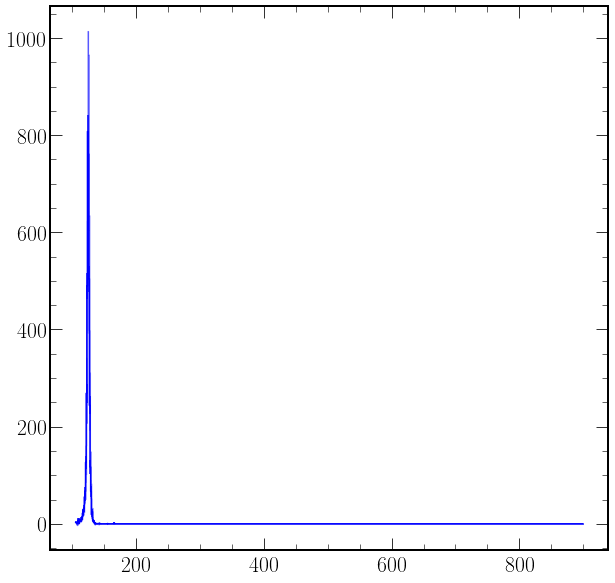

In [80]:
fig, ax = plt.subplots(1)
SysHist.from_dict(hist_list[1000]).draw(ax)

In [40]:
hist_list

[{'index': 20,
  'type': 'bck',
  'category': 'DY',
  'file': 'assets_feb_23/data/tw_2018_ZToEE_M_120_200.csv',
  'mass': nan,
  'dbs': nan,
  'gmu': nan,
  'gb': nan,
  'era': 2018,
  'xsec': 19320.0,
  'sample_name': 'ZToEE_M_120_200',
  'nom': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [ ]:
beep_repeat()

In [ ]:
combined_df[combined_df.category=='BFF'].iloc[0:100]['Weight']

In [ ]:
combined_df[combined_df.category=='BFF'][[x for x in combined_df.keys() if 'BTag' in x]]

In [ ]:
combined_df.name.unique()

In [ ]:
[x for x in combined_df.keys() if 'Weight' in x]

In [ ]:
beep_repeat()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
bck_df = combined_df[(combined_df.type=='bck')]
no_bff = bck_df[(bck_df.SR1_nom > 0 )]
post_bff = bck_df[(bck_df.SR1_nom ==1)]
from src.plotting_tools.Bins import make_bins
bins=make_bins()

In [ ]:
counts, _  = np.histogram(no_bff.DiLepMass,bins=bins.bin_edges, weights=no_bff.Weight)

In [ ]:
counts_cut, _  = np.histogram(post_bff.DiLepMass,bins=bins.bin_edges, weights=post_bff.Weight)

In [ ]:
plt.plot(bins.calc_bin_centers(), counts)
plt.plot(bins.calc_bin_centers(),counts_cut)


In [ ]:
plt.plot(bins.calc_bin_centers(),counts_cut/counts)
plt.ylim(top=1, bottom=0)

In [ ]:
#make counts for regions

columns = combined_df.iloc[0:1].filter(regex='[C|S]R.+nom.+ted_pt').columns

import re
cd = combined_df[combined_df.DiLepMass_jet_nom_muon_corrected_pt_ele_pt>120]
def get_sample_stats(name, cd):
    tdf = cd[cd.name==name]
    return {'name': name, **{re.findall('([C|S]R[0-9]+)', x)[0]:  tdf[tdf[x]==1].Weight.sum()  for x in columns}}

samples  = []
for name in combined_df.name.unique():
    print(name)
    samples.append(get_sample_stats(name, cd))
    
df = pd.DataFrame(samples)
df[['SR2','SR1','CR10', 'CR13', 'CR14', 'CR20','CR23','CR24']].round(2)

In [ ]:
print(df[['SR2','SR1','CR10', 'CR13', 'CR14', 'CR20','CR23','CR24']].round(1).to_latex())